# EXPLORATORY DATA ANALYSIS
## GOOGLE PLAY STORE APPS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline


## Data Loading and Overview

In [2]:
df = pd.read_csv('googleplaystore.csv')

# Display the first few rows
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Handling the Missing Values

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [5]:
# Impute missing values in 'Rating' with the median
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# Impute missing values in categorical columns with the mode
df['Type'] = df['Type'].fillna(df['Type'].mode()[0])
df['Content Rating'] = df['Content Rating'].fillna(df['Content Rating'].mode()[0])
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

# Verify there are no more missing values
print(df.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [6]:
# Verify data types
print(df.dtypes)


App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


# Summary Statistics
### Nmerical Features

In [7]:
# Summary statistics for numerical features
print(df.describe())

             Rating
count  10841.000000
mean       4.207841
std        0.500893
min        1.000000
25%        4.100000
50%        4.300000
75%        4.500000
max       19.000000


### Categorial Features

In [8]:
print(df.describe(include=['object']))

           App Category Reviews                Size    Installs   Type  Price  \
count    10841    10841   10841               10841       10841  10841  10841   
unique    9660       34    6002                 462          22      3     93   
top     ROBLOX   FAMILY       0  Varies with device  1,000,000+   Free      0   
freq         9     1972     596                1695        1579  10040  10040   

       Content Rating Genres    Last Updated         Current Ver Android Ver  
count           10841  10841           10841               10841       10841  
unique              6    120            1378                2832          33  
top          Everyone  Tools  August 3, 2018  Varies with device  4.1 and up  
freq             8715    842             326                1467        2454  


# Correct the Data Type

##### Reviews: Convert to numeric.
##### Size: Clean and convert to numeric.
##### Installs: Clean and convert to numeric.
##### Price: Clean and convert to numeric.
##### Last Updated: Convert to datetime.

In [9]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

In [10]:
df = df[df['Installs'].str.contains(r'^\d+[+,]?$')]  # Keep only valid entries
df['Installs'] = df['Installs'].str.replace(r'[+,]', '', regex=True).astype(int)

In [11]:
df = df[df['Price'].str.startswith('$')]  # Keep only entries starting with '$'
df['Price'] = df['Price'].str.replace(r'\$', '', regex=True).astype(float)

In [12]:
# Remove invalid entries in 'Size'
df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].astype(str)
df['Size'] = df['Size'].str.replace('M', '').str.replace('k', 'e-3')
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')


In [13]:
# Remove rows with invalid 'Last Updated' formats
df = df[pd.to_datetime(df['Last Updated'], errors='coerce').notna()]
df['Last Updated'] = pd.to_datetime(df['Last Updated'])

In [14]:
# Drop rows with any remaining invalid entries
df = df.dropna(subset=['Installs', 'Price', 'Size', 'Last Updated'])


In [15]:
print(df.dtypes)

App                       object
Category                  object
Rating                   float64
Reviews                  float64
Size                     float64
Installs                   int32
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object


## Univariate Analysis

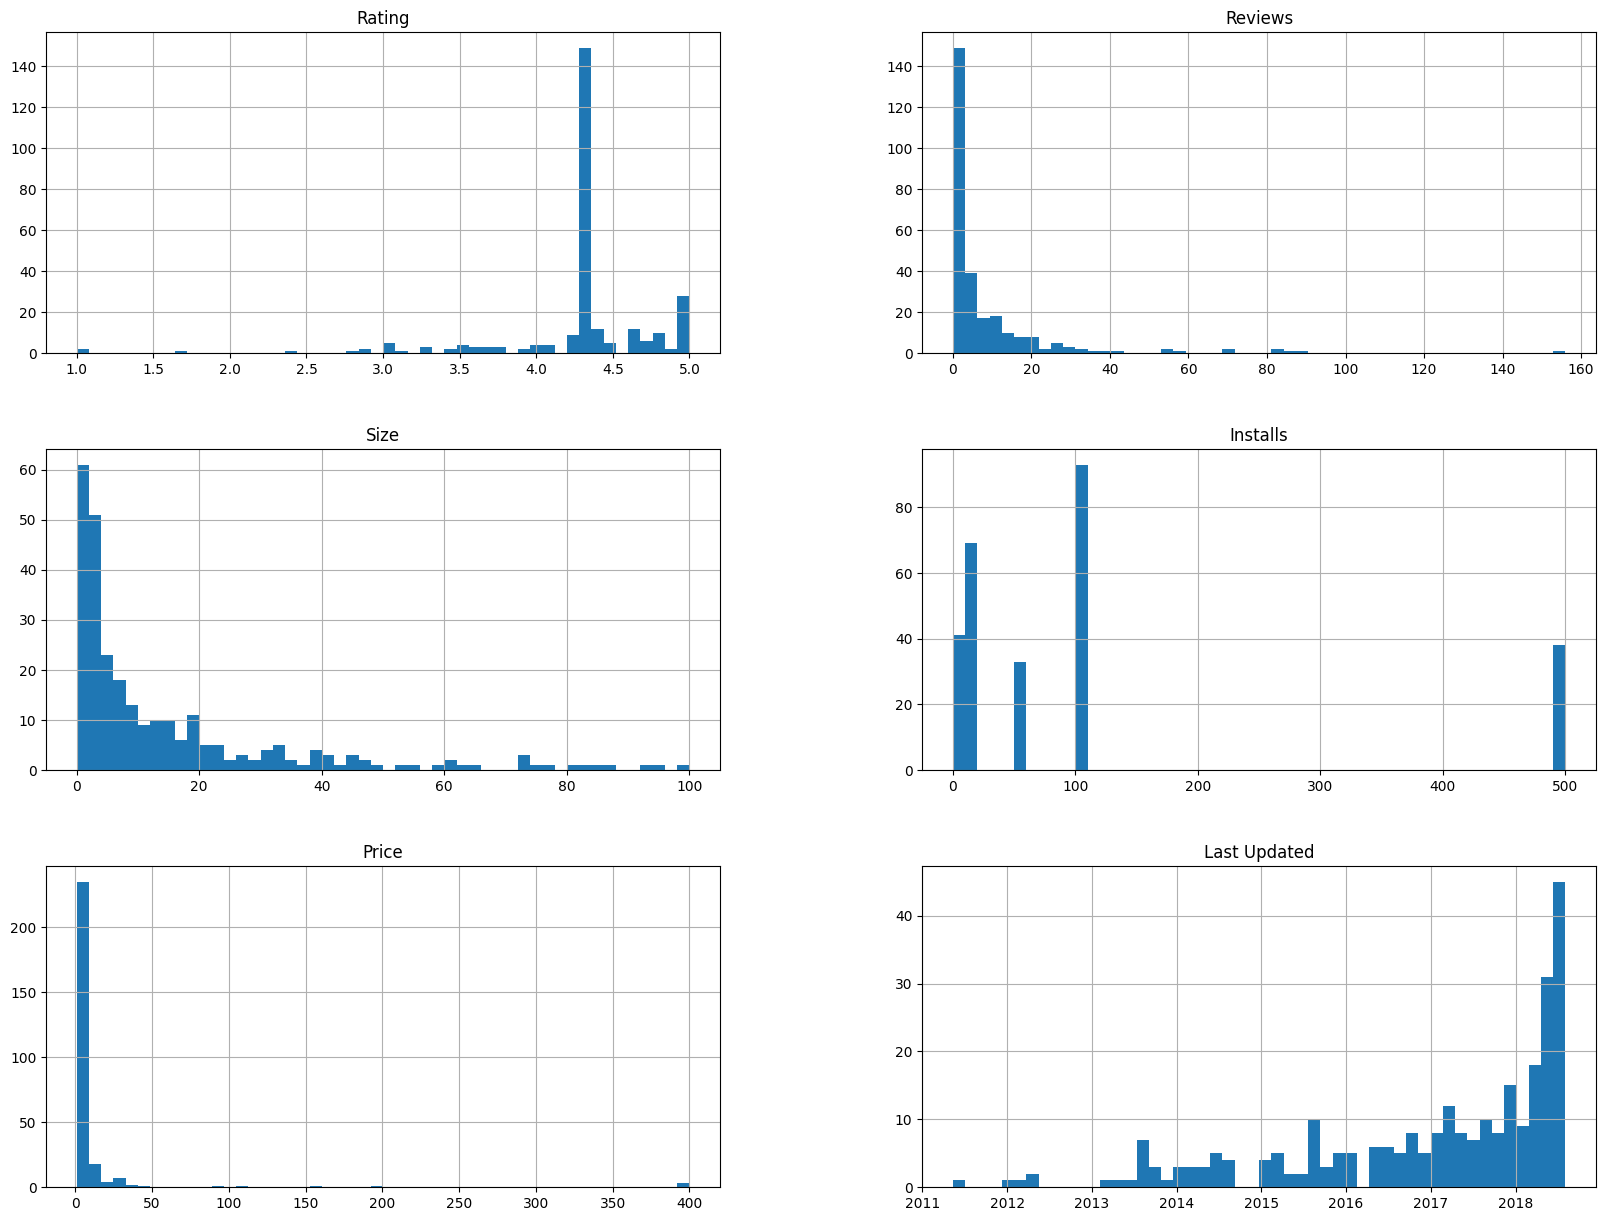

In [16]:
df.hist(bins=50, figsize=(20,15))
plt.show()


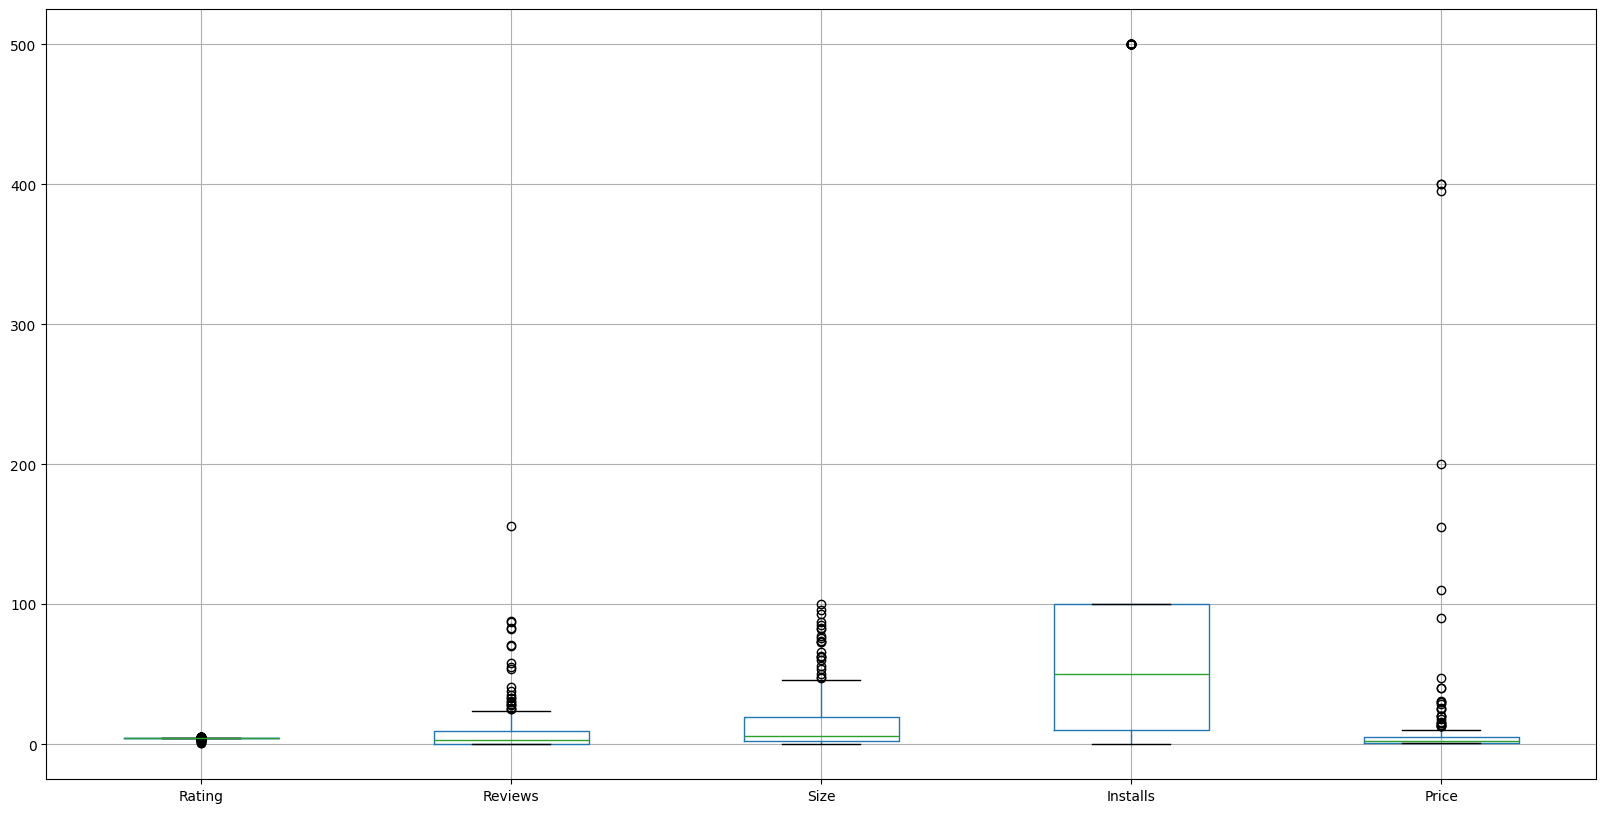

In [17]:
df.boxplot(column=['Rating', 'Reviews', 'Size', 'Installs', 'Price'], figsize=(20,10))
plt.show()


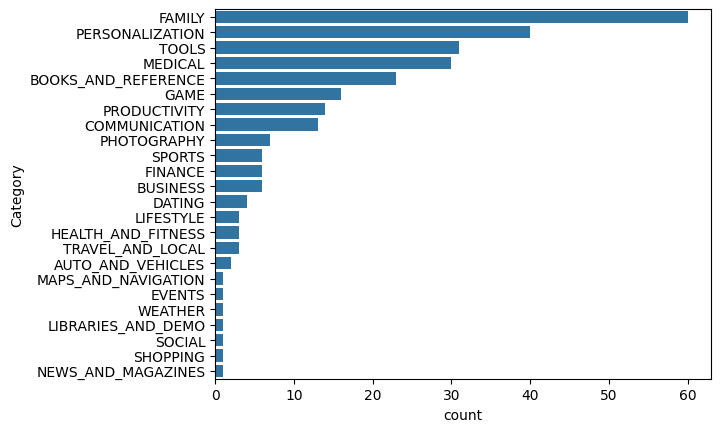

In [18]:
sns.countplot(y='Category', data=df, order = df['Category'].value_counts().index)
plt.show()


## Bivariate analysis

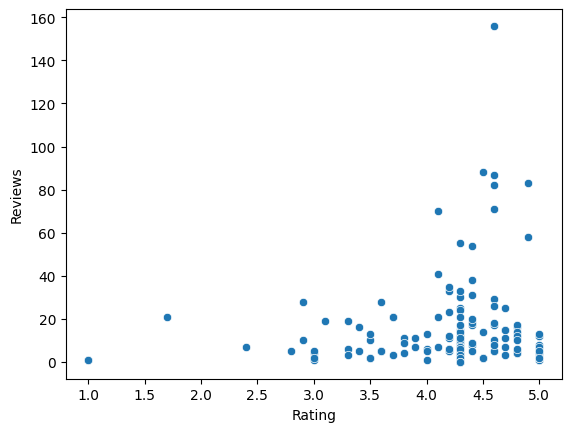

In [19]:
sns.scatterplot(x='Rating', y='Reviews', data=df)
plt.show()


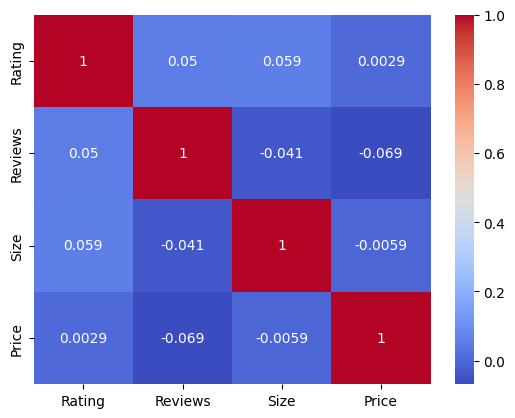

In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


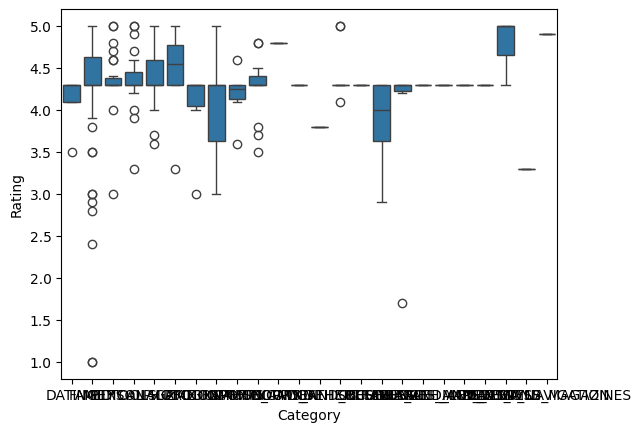

In [21]:
sns.boxplot(x='Category', y='Rating', data=df)
plt.show()


## Multivariate Analysis

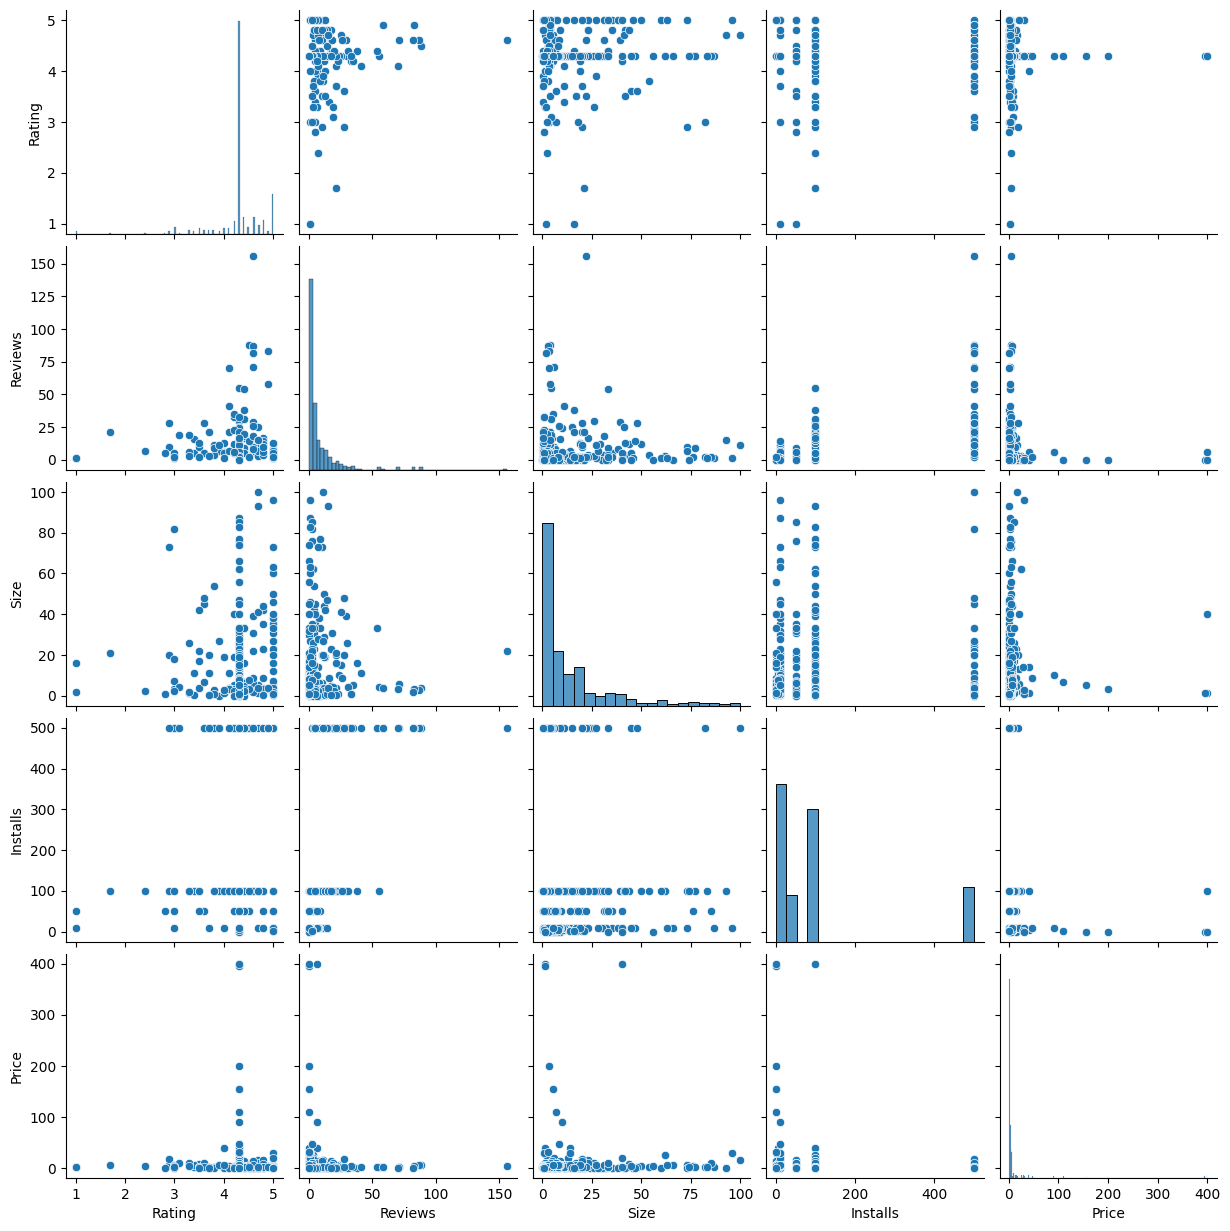

In [22]:
sns.pairplot(df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']])
plt.show()


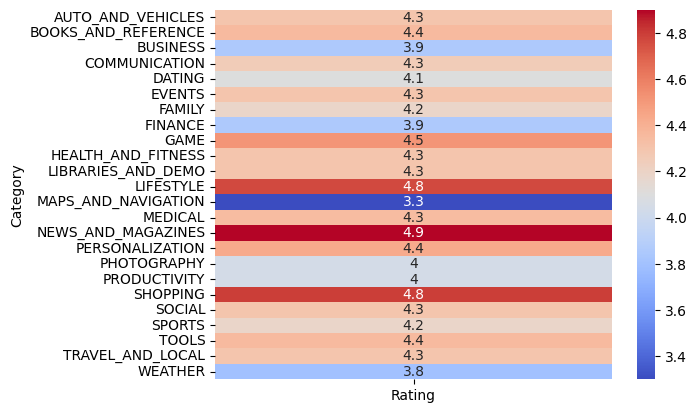

In [23]:
category_rating = df.pivot_table(index='Category', values='Rating', aggfunc='mean')
sns.heatmap(category_rating, annot=True, cmap='coolwarm')
plt.show()


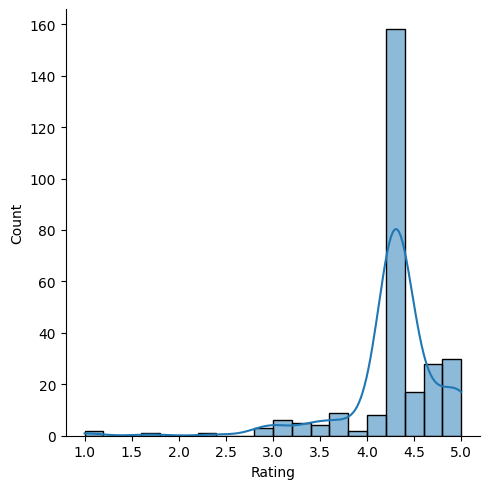

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['Rating'].dropna(), bins=20, kde=True)
plt.show()


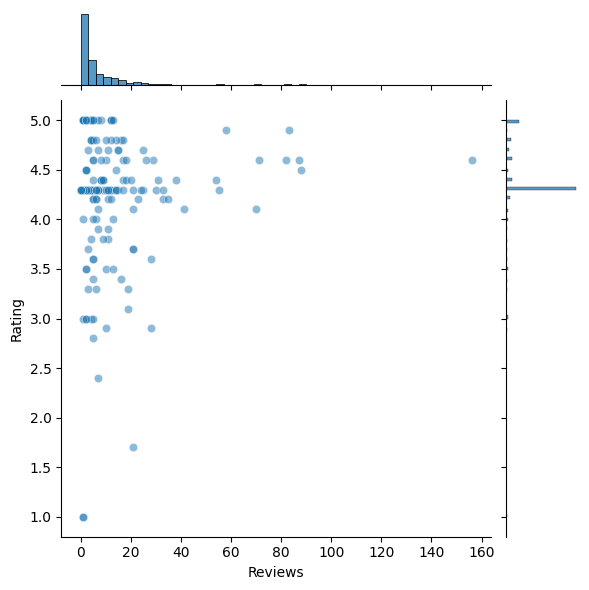

In [25]:
sns.jointplot(x='Reviews', y='Rating', data=df, alpha=0.5)
plt.show()


In [26]:
category_downloads = df.pivot_table(index='Category', values='Installs', aggfunc='sum').sort_values(by='Installs', ascending=False)
print(category_downloads.head())


                 Installs
Category                 
FAMILY               5764
PERSONALIZATION      4784
MEDICAL              4533
TOOLS                4341
COMMUNICATION        2050


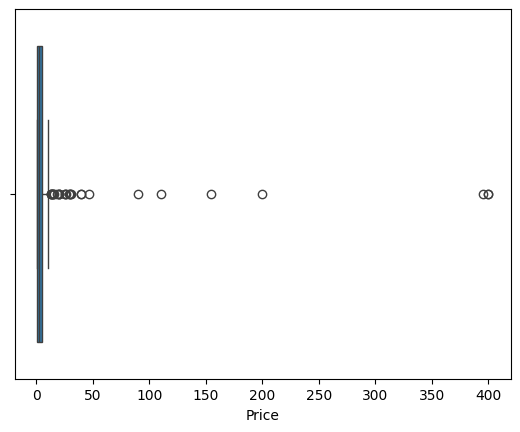

In [27]:
sns.boxplot(x='Price', data=df)
plt.show()


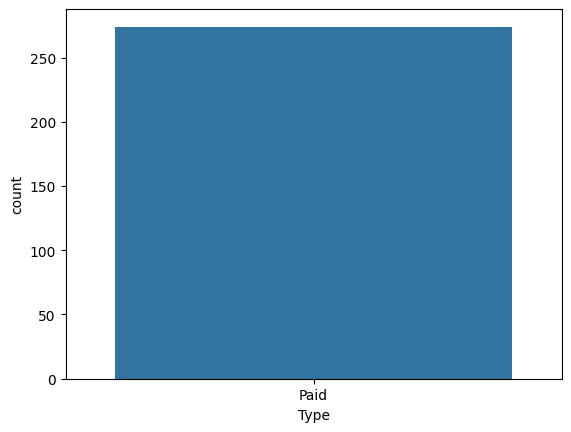

In [28]:
sns.countplot(x='Type', data=df)
plt.show()


In [29]:
df['Revenue_Estimate'] = df['Price'] * df['Installs']
print(df[['App', 'Price', 'Installs', 'Revenue_Estimate']].sort_values(by='Revenue_Estimate', ascending=False).head())


                                                  App   Price  Installs  \
4197                           most expensive app (H)  399.99       100   
6837                               SkyTest BU/GU Lite   17.99       500   
2299                             Navi Radiography Pro   15.99       500   
8211  ACCDB MDB DB Manager Pro - Editor for MS Access    8.99       500   
2414                                     LTC AS Legal   39.99       100   

      Revenue_Estimate  
4197           39999.0  
6837            8995.0  
2299            7995.0  
8211            4495.0  
2414            3999.0  


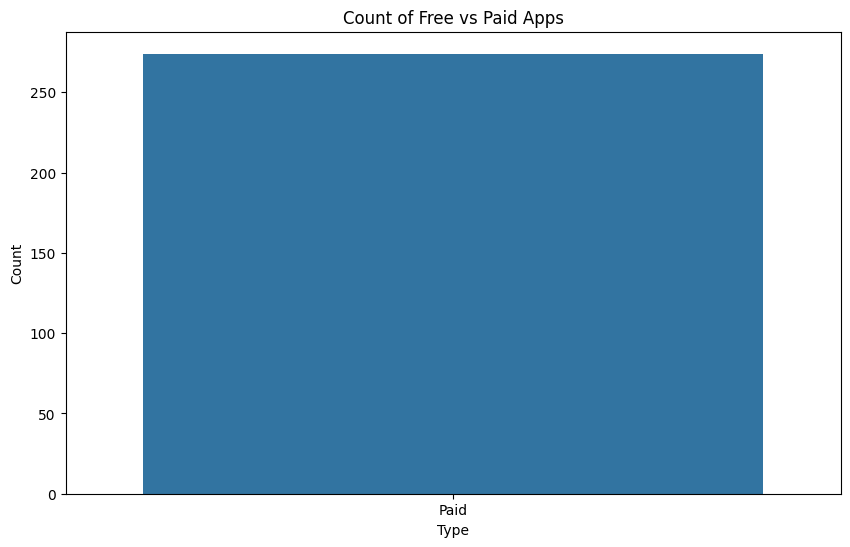

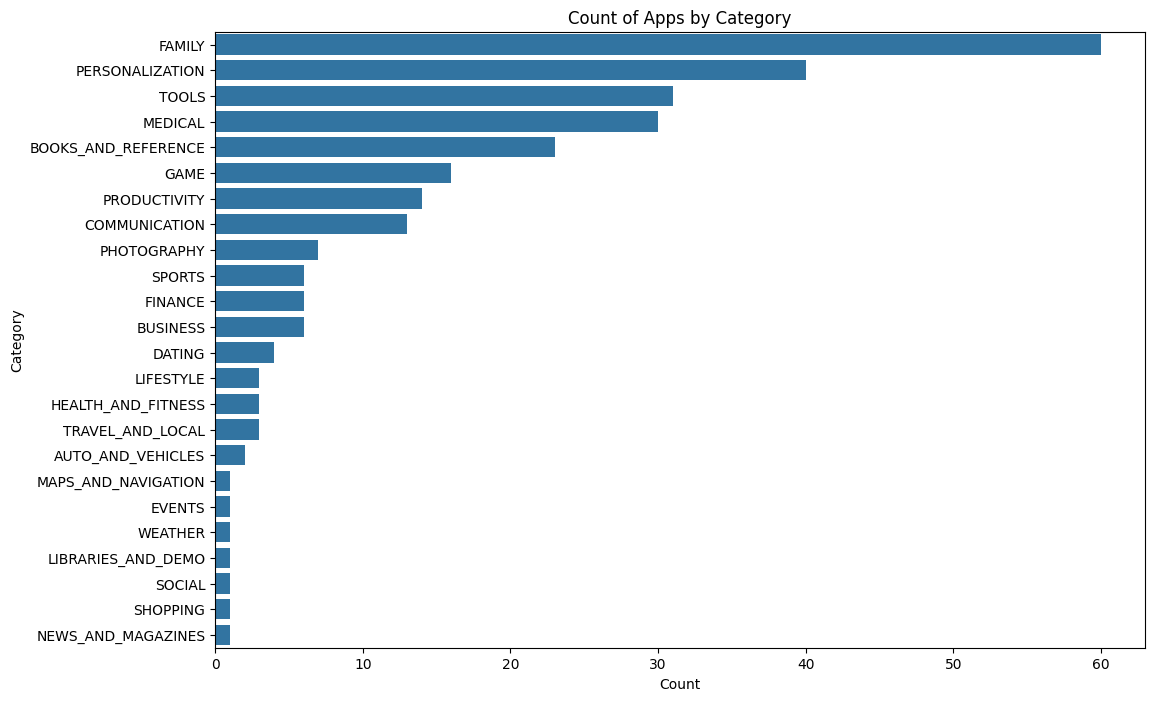

In [30]:
# Bar Charts for summarizing categorical data
plt.figure(figsize=(10,6))
sns.countplot(x='Type', data=df)
plt.title('Count of Free vs Paid Apps')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,8))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Count of Apps by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

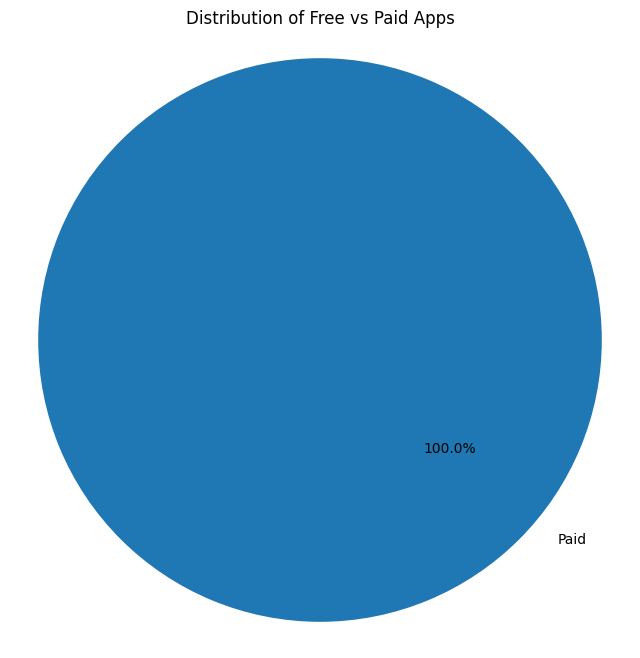

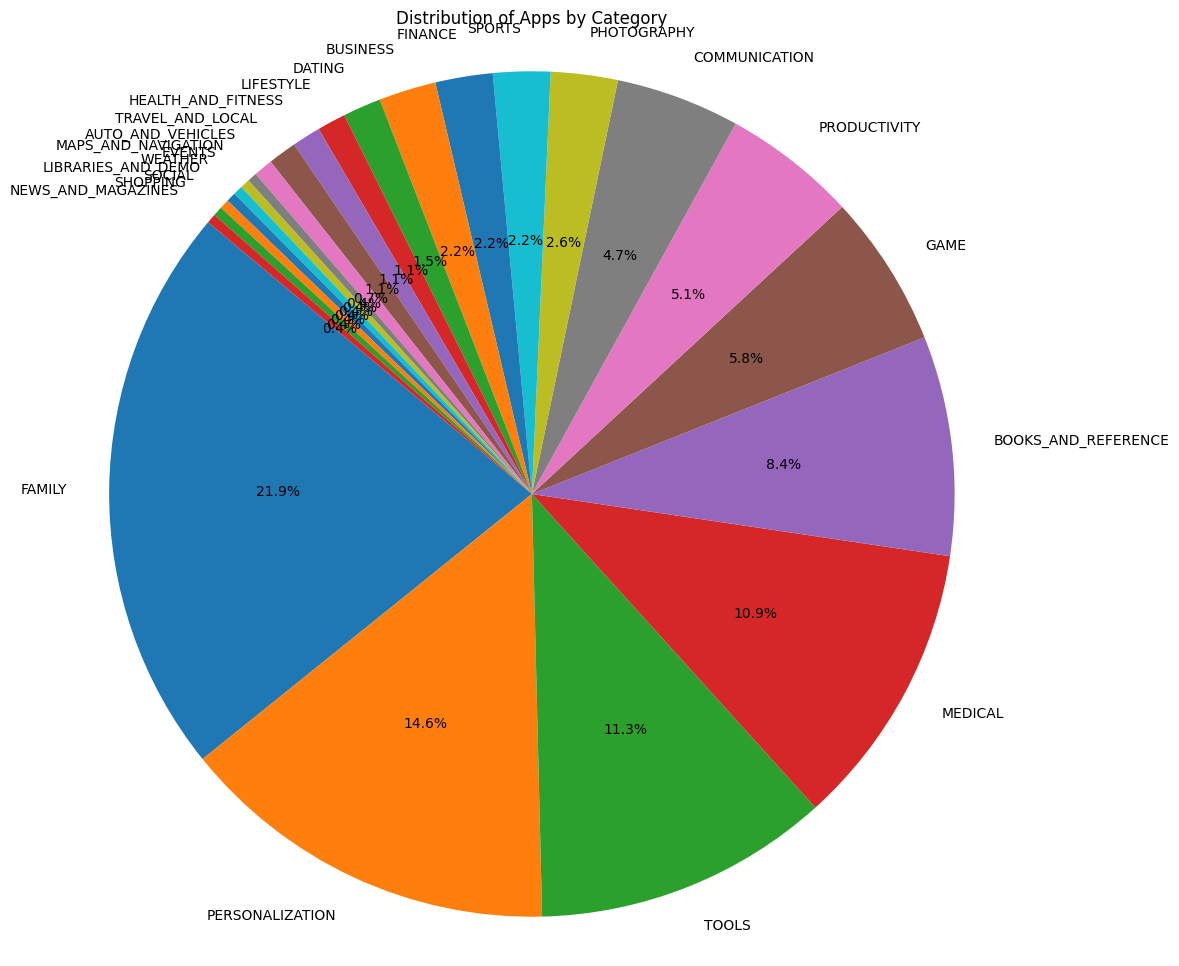

In [31]:
# Pie Charts for summarizing categorical data
type_counts = df['Type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Free vs Paid Apps')
plt.axis('equal')
plt.show()

category_counts = df['Category'].value_counts()
plt.figure(figsize=(12,12))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Apps by Category')
plt.axis('equal')
plt.show()


## Clustering

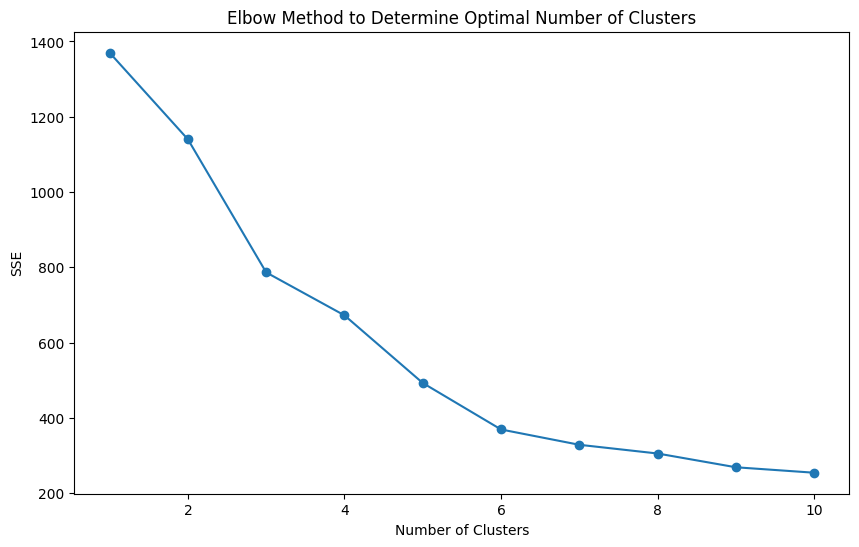

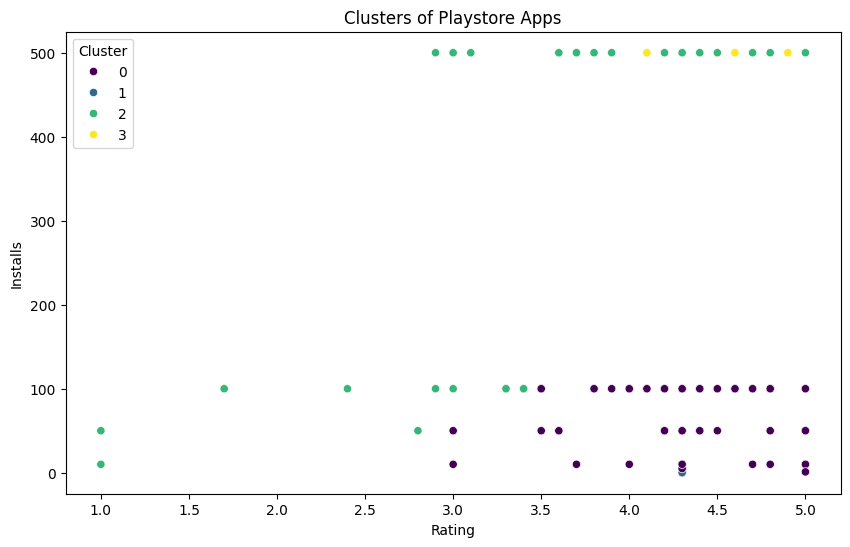

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it has been preprocessed
# Select relevant features
features = df[['Rating', 'Reviews', 'Size', 'Installs', 'Price']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.show()

# Fit KMeans with the optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Installs', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Playstore Apps')
plt.show()


## Predictive Modeling

Mean Squared Error: 0.40376195806703385
R-squared: 0.011876508298321098


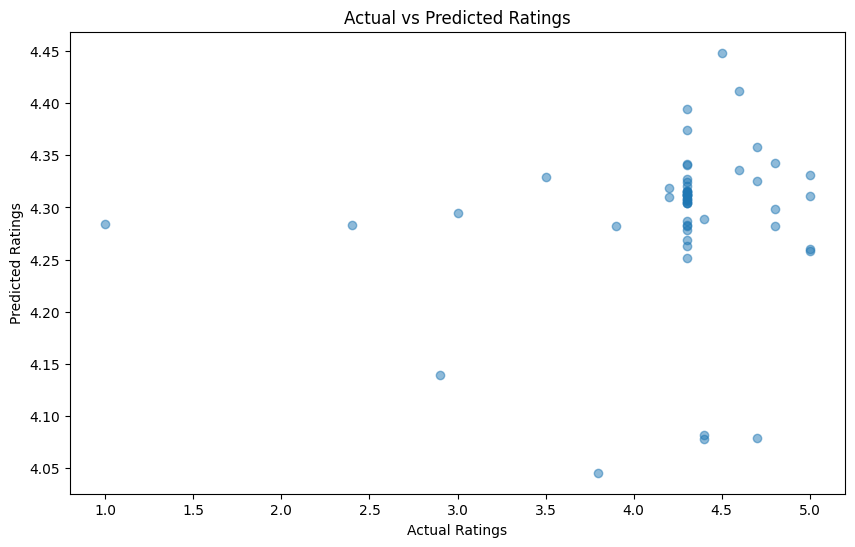

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features and target
X = df[['Reviews', 'Size', 'Installs', 'Price']].copy()
y = df['Rating'].copy()

# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()


## Feature Engineering

Mean Squared Error: 0.4552823787845312
R-squared: -0.11420901560054264


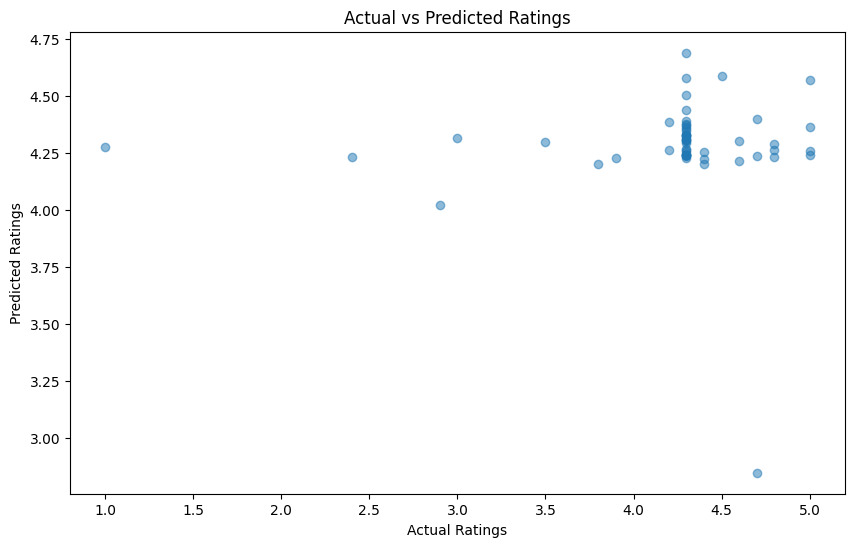

In [35]:
from sklearn.preprocessing import PolynomialFeatures

# Select features and target
X = df[['Reviews', 'Size', 'Installs', 'Price']].copy()
y = df['Rating'].copy()

# Handle missing values
X = X.fillna(X.mean())
y = y.fillna(y.mean())

# Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings')
plt.show()


## Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Train the best model
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Mean Squared Error: 0.42753398523963243
R-squared: -0.04630058844221807


## Model Comparison

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - R-squared: {r2_gb}')

# Compare with Random Forest
print(f'Random Forest - Mean Squared Error: {mse}')
print(f'Random Forest - R-squared: {r2}')


Gradient Boosting - Mean Squared Error: 0.5157767055572327
Gradient Boosting - R-squared: -0.26225630981556614
Random Forest - Mean Squared Error: 0.42753398523963243
Random Forest - R-squared: -0.04630058844221807


##  Cross-Validation

In [38]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_poly, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation Scores: {-cv_scores}')
print(f'Mean CV Score: {-cv_scores.mean()}')


Cross-Validation Scores: [0.3988941  0.15633621 0.53422356 0.27034541 0.15283288]
Mean CV Score: 0.3025264317767798


## Advanced Visualization

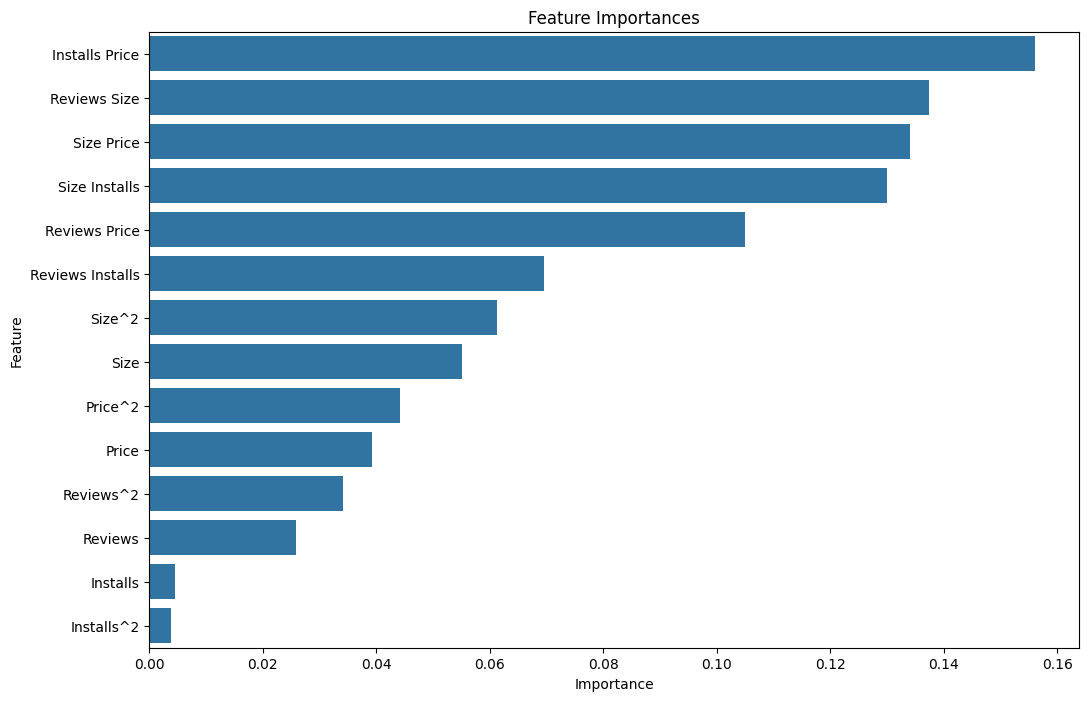

In [39]:
import seaborn as sns

# Feature importances for the best model
feature_importances = best_model.feature_importances_
features = poly.get_feature_names_out()

# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importances')
plt.show()


## Interpretability

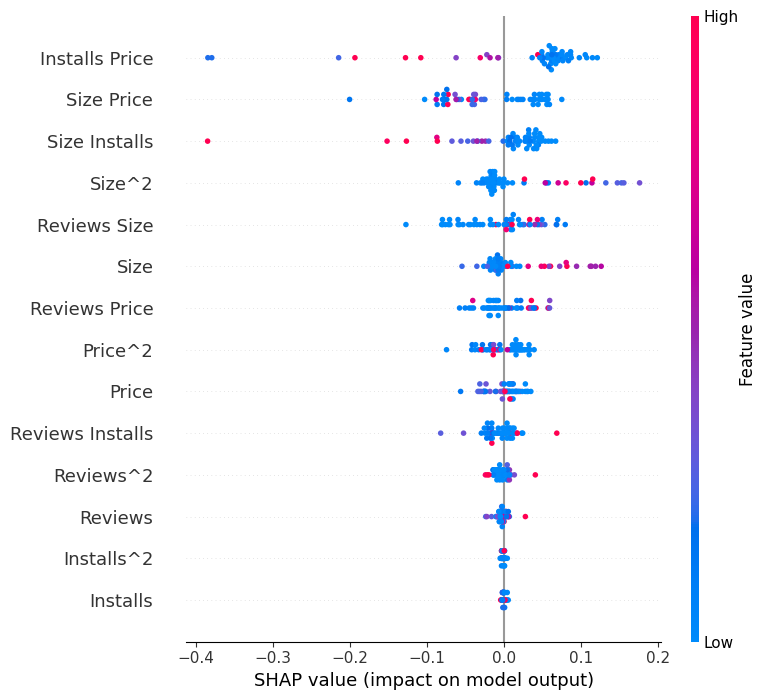

In [42]:
import shap

# Initialize the SHAP explainer
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=features)


## Cluster Analysis

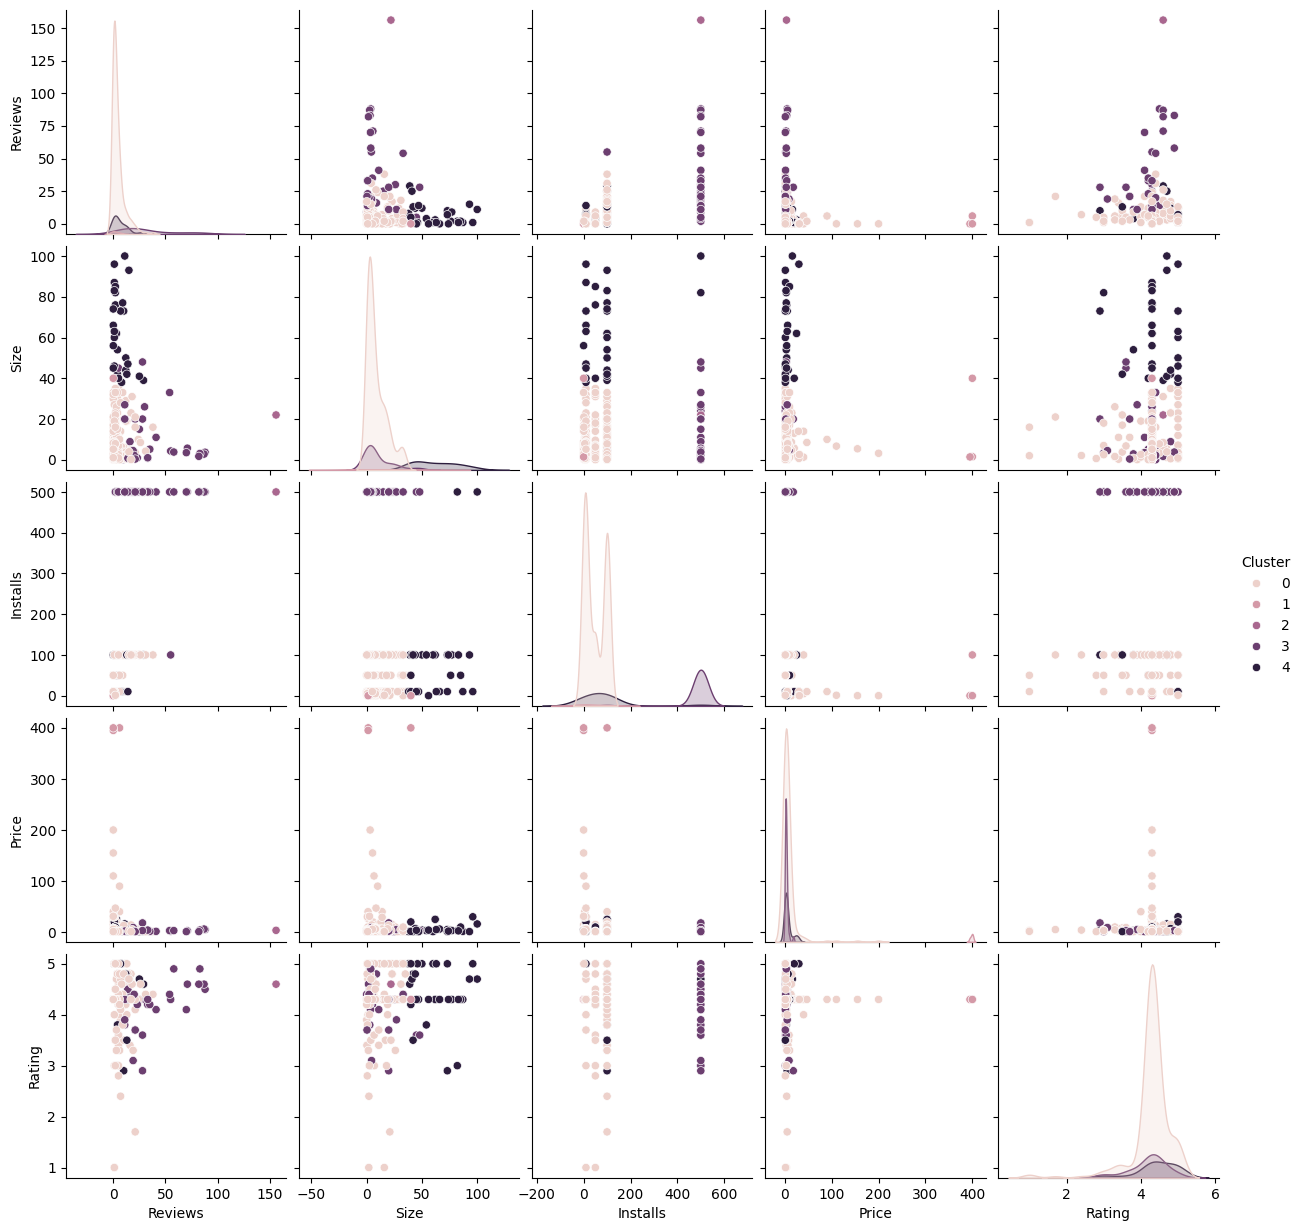

In [43]:
from sklearn.cluster import KMeans
import seaborn as sns

# Select relevant features
X_cluster = df[['Reviews', 'Size', 'Installs', 'Price']]

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster.fillna(X_cluster.mean()))

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.pairplot(df, hue='Cluster', vars=['Reviews', 'Size', 'Installs', 'Price', 'Rating'])
plt.show()


## Sentiment Analysis on Reviews

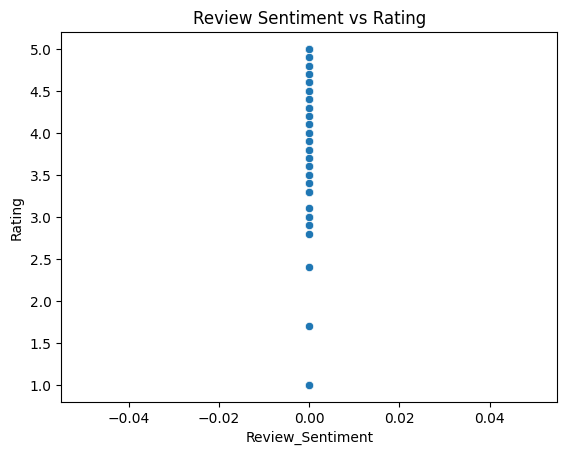

In [50]:
from textblob import TextBlob

# Sample textual data
df['Review_Sentiment'] = df['Reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Analyze sentiment vs rating
sns.scatterplot(x='Review_Sentiment', y='Rating', data=df)
plt.title('Review Sentiment vs Rating')
plt.show()


In [54]:

df.to_csv('cleaned_googleplaystore.csv', index=False)
